In [1]:
import csv
import operator
import pprint
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

## Importing and setting up our data

We start by brining in the CSV data into our Python program
We then parse the data using the CSV package
Lastly we close the csv file after we have read the information

In [2]:
with open("data/bestsellers_with_categories.csv", "r",encoding="UTF-8") as datafile:
    bestseller_data = csv.DictReader(datafile)
    
    data_list = list(bestseller_data)
    

In [3]:
data_list[0]

{'Name': '10-Day Green Smoothie Cleanse',
 'Author': 'JJ Smith',
 'User Rating': '4.7',
 'Reviews': '17350',
 'Price': '8',
 'Year': '2016',
 'Genre': 'Non Fiction'}

## Format the data before we generate a visualization

Parse the data by bestseller year, and count the number of fiction and nonfiction books for each year.

In [4]:
# In this section I created a dictionary which will eventually have the years 2009-2019 as keys with the count of fiction and nonfiction bestseller books from that year as values.
timeline = {}
year_1 = []
year_2 = []
year_3 = []
year_4 = []
year_5 = []
year_6 = []
year_7 = []
year_8 = []
year_9 = []
year_10 = []
year_11  = []


# This for loop stores fiction bestseller books from each year and appends them to a list.
for item in data_list:
    
     if item["Year"] == "2009":
            if item["Genre"] == "Fiction":
                    year_1.append(item)
                
     elif item["Year"] == "2010":
            if item["Genre"] == "Fiction":
                    year_2.append(item)
                
     elif item["Year"] == "2011":
            if item["Genre"] == "Fiction":
                    year_3.append(item)

     elif item["Year"] == "2012":
            if item["Genre"] == "Fiction":
                    year_4.append(item)

     elif item["Year"] == "2013":
                if item["Genre"] == "Fiction":
                    year_5.append(item)
    
     elif item["Year"] == "2014":
            if item["Genre"] == "Fiction":
                    year_6.append(item)
                
     elif item["Year"] == "2015":
            if item["Genre"] == "Fiction":
                year_7.append(item)
        
     elif item["Year"] == "2016":
            if item["Genre"] == "Fiction":
                    year_8.append(item)
    
     elif item["Year"] == "2017":
            if item["Genre"] == "Fiction":
                    year_9.append(item)
        
     elif item["Year"] == "2018":
            if item["Genre"] == "Fiction":
                    year_10.append(item)
                
     elif item["Year"] == "2019":
            if item["Genre"] == "Fiction":
                    year_11.append(item)
                             
    
# Here the length of each list above and the length of each list above subtracted from 50 will become the values to the corresponding year.
timeline["2009"] = [len(year_1), 50 - len(year_1)]
timeline["2010"] = [len(year_2), 50 - len(year_2)]
timeline["2011"] = [len(year_3), 50 - len(year_3)]
timeline["2012"] = [len(year_4), 50 - len(year_4)]
timeline["2013"] = [len(year_5), 50 - len(year_5)]
timeline["2014"] = [len(year_6), 50 - len(year_6)]
timeline["2015"] = [len(year_7), 50 - len(year_7)]
timeline["2016"] = [len(year_8), 50 - len(year_8)]
timeline["2017"] = [len(year_9), 50 - len(year_9)]
timeline["2018"] = [len(year_10), 50 - len(year_10)]
timeline["2019"] = [len(year_11), 50 - len(year_11)]
pprint.pprint(timeline)


{'2009': [24, 26],
 '2010': [20, 30],
 '2011': [21, 29],
 '2012': [21, 29],
 '2013': [24, 26],
 '2014': [29, 21],
 '2015': [17, 33],
 '2016': [19, 31],
 '2017': [24, 26],
 '2018': [21, 29],
 '2019': [20, 30]}


## Create the Visualization

Now that the data is parsed, I will matplotlib to create a 100% horizontal bar graph.

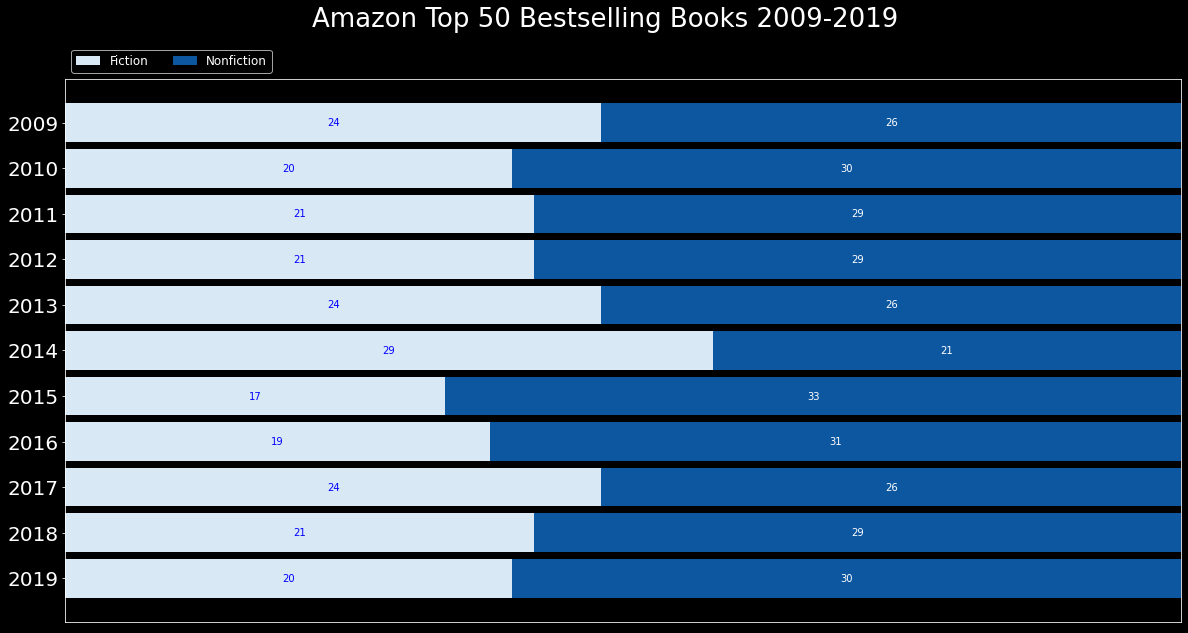

In [5]:
category_names = ['Fiction', 'Nonfiction']
results = timeline

plt.style.use('dark_background')



def survey(results, category_names):
    
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap("Blues")(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_facecolor('black')
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)

    ax.set_xlim(0, np.sum(data, axis=1).max())
    fig.suptitle('Amazon Top 50 Bestselling Books 2009-2019', fontsize=26)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=.85,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'blue'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize="large")
    

    return fig, ax

   
# 
survey(results, category_names)
plt.tick_params(labelsize=20)
plt.show()



## Format the data before we generate a visualization

Create a dictionary of five time Amazon bestselling authors from 2009-2019.

In [6]:
# This creates a dictionary sorted alphabetically with the authors as the keys and books as the values.
name_dictionary = {}
for authors in data_list:
    if name_dictionary.get(authors["Author"]):
        name_dictionary[authors["Author"]].append(authors["Name"])
    else:
        name_dictionary[authors["Author"]] = [authors["Name"]]
# pprint.pprint(name_dictionary)

   
    
# This step appends the keys from the name_dictionary that have been bestsellers less than five times to the list to_remove.
to_remove = []
for key, item in name_dictionary.items():
    if len(item) < 5:
        to_remove.append(key)    
# pprint.pprint(to_remove)



# This step for loops through each string in the to_remove list and pops the corresponding keys from the name_dictionary.
for person in to_remove:
    name_dictionary.pop(person)
# pprint.pprint(name_dictionary)



# The keys from the name_dictionary are printed in a list from A to Z and will be the x-axis labels.
Authors = name_dictionary.keys()
Bestselling_Authors = sorted(list(Authors))
# pprint.pprint(Bestselling_Authors)



# The amount of times each author was an Amazon bestseller from 2009-2019 is appended to the list First. The list First will contain the first column value for every author.
First = []
for key, value in sorted(name_dictionary.items()):
        First.append(len(value))
# print(First)



# The amount of different Amazon bestselling books from 2009-2019 by each author is appended to the list Second. Ths list Second will contain all of the second column values for each author.
Second = []
for key, value in sorted(name_dictionary.items()):
        book_variety = set(value)
        Second.append(len(book_variety))
# print(Second)

## Create the Visualization

Now that the data is parsed, we will use matplotlib to create a vertical two column graph.

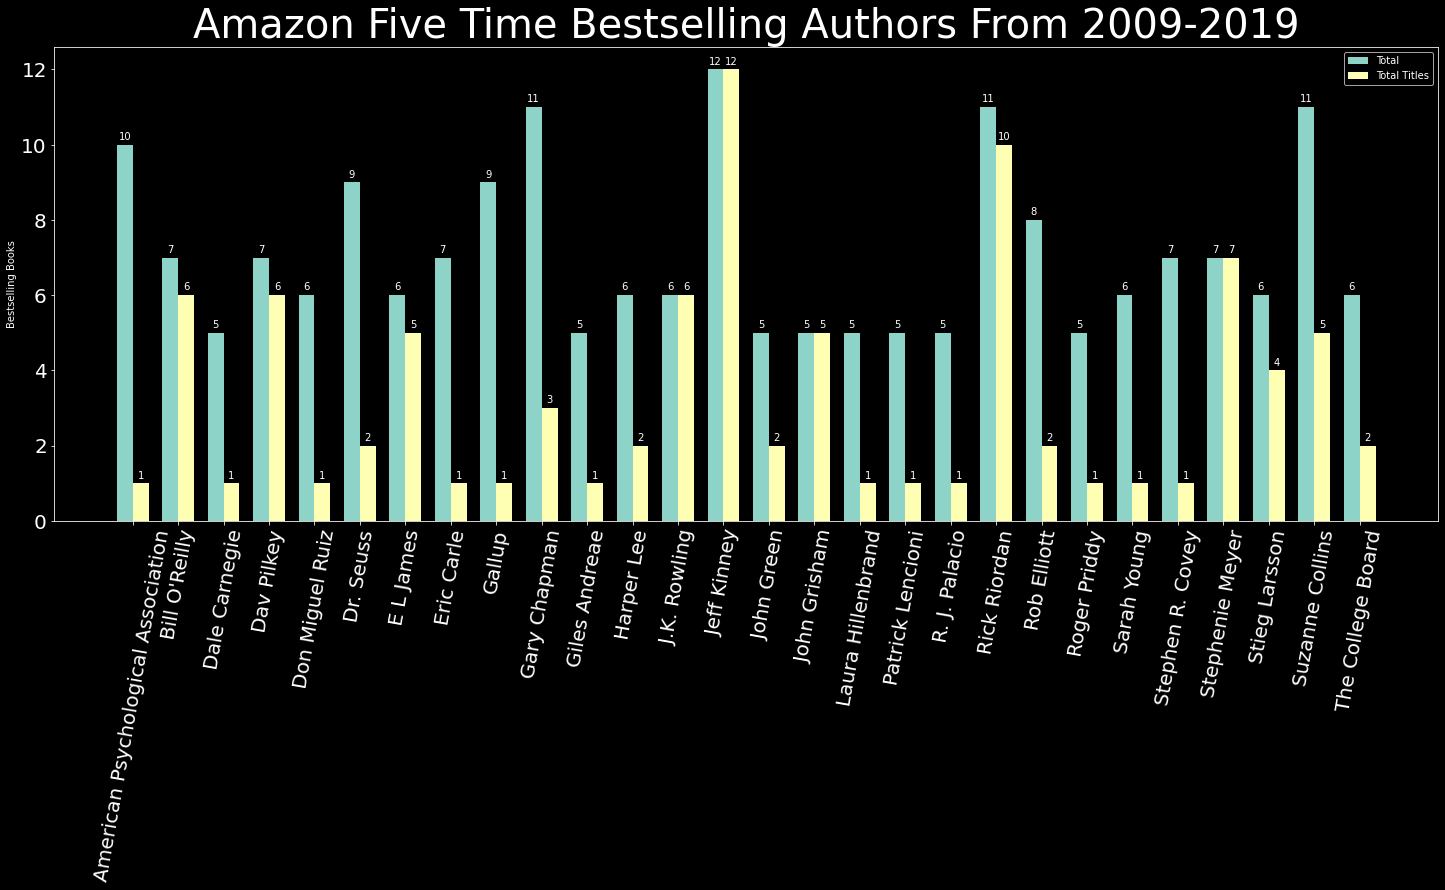

In [7]:
labels = Bestselling_Authors
total = First
total_titles = Second

x = np.arange(len(Bestselling_Authors))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, total, width, label='Total')
rects2 = ax.bar(x + width/2, total_titles, width, label='Total Titles')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bestselling Books')
ax.set_title('Amazon Five Time Bestselling Authors From 2009-2019', fontsize="40")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=80)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.tick_params(labelsize=20)


plt.show()



In [8]:
# year_one = []
# year_two = []
# year_three = []
# year_four = []
# year_five = []
# year_six = []
# year_seven = []
# year_eight = []
# year_nine = []
# year_ten = []
# year_eleven = []

#             else:
#                 year_one.append(item)
#             else:
#                 year_two.append(item)
#             else:
#                 year_three.append(item)
#             else:
#                 year_four.append(item)
#                 else:
#                     year_five.append(item)
#             else:
#                 year_six.append(item)
#              else:
#                 year_seven.append(item)
#             else:
#                 year_eight.append(item)
#             else:
#                 year_nine.append(item)
#             else:
#                 year_ten.append(item)
#             else:
#                 year_eleven.append(item)



            

In [9]:
# temp = []
# for item in data_list:
#         temp.append(item["Author"])
# pprint.pprint(sorted(temp))

#     print(len(item))

# print(len (name_dictionary))
#          print(len(value)) 
#         print(len(book_variety))